Metodos de interpretación agnostica de modelos ML

* PDP o gráfico de Dependencia Parcial
* ICE o gráfico de Esperanza Condicional individual
* Importancia de Variables
* LIME
* SHAPLEY VALUES

https://quanam.com/interpretabilidad-de-los-modelos-de-machine-learning-segunda-parte/

In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
y_hat = model.predict(X)

In [47]:
error = np.abs(y-y_hat)/(y)

In [48]:
MAPE = np.mean(error)
print(MAPE)

0.06238352664838372


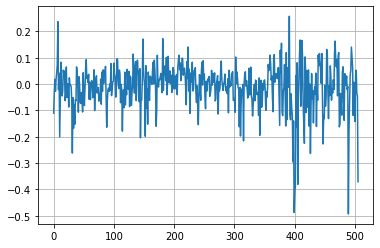

In [29]:
plt.plot(error)
plt.grid(True)

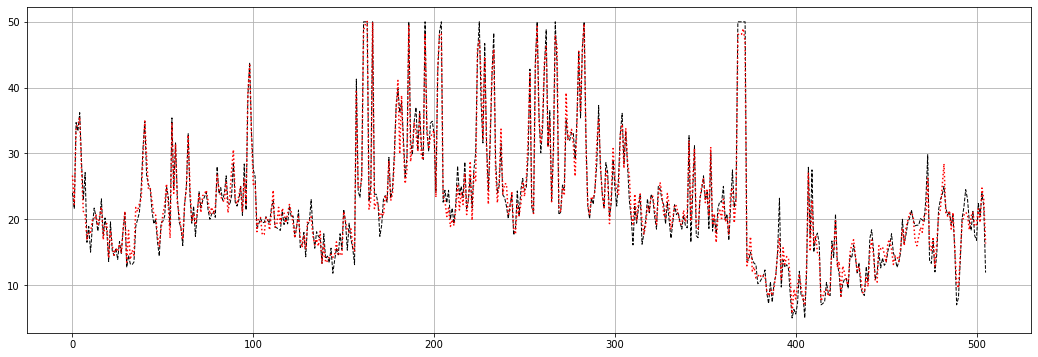

In [44]:
plt.figure(figsize=(18,6))
plt.plot(y, label='data', linewidth=1, color='k', linestyle='dashed')
plt.plot(y_hat, color='red', label='Prediction', linestyle='dotted')
plt.grid(True)

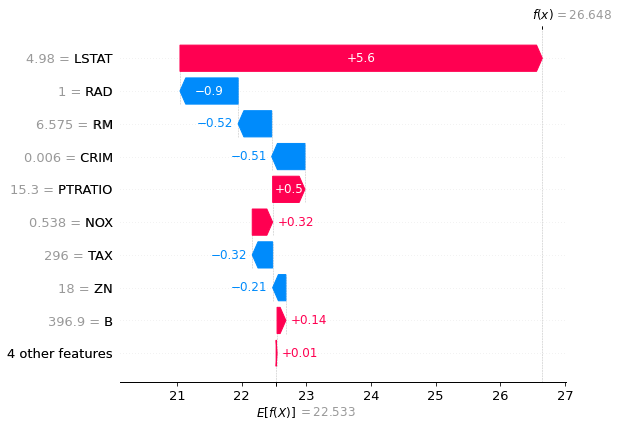

In [38]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

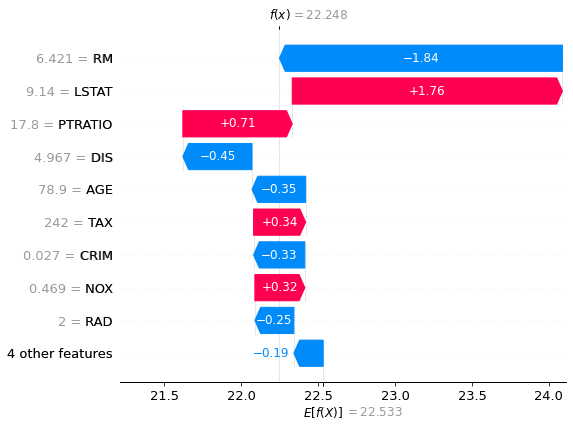

In [39]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. Another way to visualize the same explanation is to use a force plot (these are introduced in our Nature BME paper):

In [32]:
shap.initjs()

In [33]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [31]:
# visualize all the training set predictions
shap.plots.force(shap_values)

To understand how a single feature effects the output of the model we can plot the SHAP value of that feature vs. the value of the feature for all the examples in a dataset. Since SHAP values represent a feature's responsibility for a change in the model output, the plot below represents the change in predicted house price as RM (the average number of rooms per house in an area) changes. Vertical dispersion at a single value of RM represents interaction effects with other features. To help reveal these interactions we can color by another feature. If we pass the whole explanation tensor to the color argument the scatter plot will pick the best feature to color by. In this case it picks RAD (index of accessibility to radial highways) since that highlights that the average number of rooms per house has less impact on home price for areas with a high RAD value.

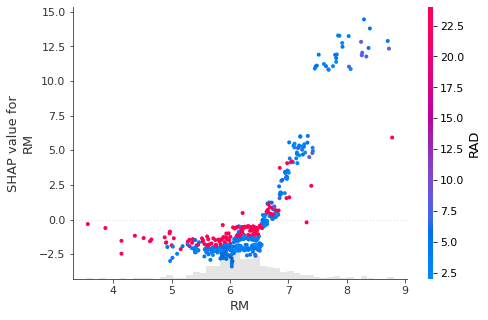

In [34]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"RM"], color=shap_values)

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a high LSTAT (% lower status of the population) lowers the predicted home price.

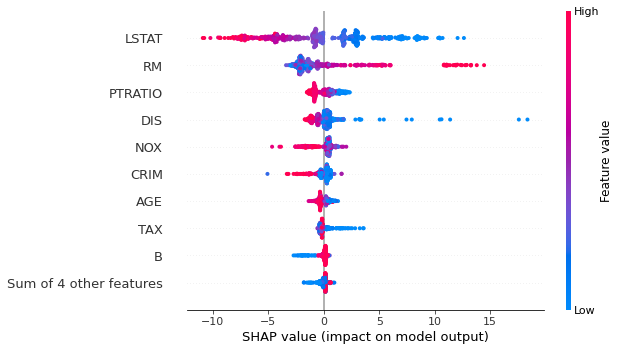

In [35]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot (produces stacked bars for multi-class outputs):

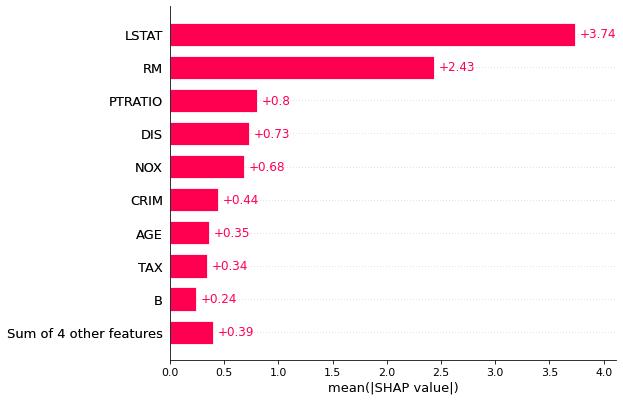

In [36]:
shap.plots.bar(shap_values)